In [1]:
#Importing python libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading train  and test data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#Looking at the target variable i.e 'SalePrice' distribution

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Alkesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


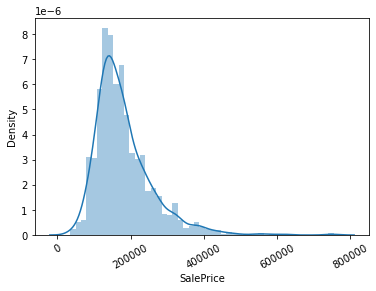

In [4]:
sns.distplot(df_train['SalePrice'])
plt.xticks(rotation=30); # Shows bit of skewness aas most of the concentration on left side

In [5]:
#Fetching number of rows and columns

df_train.shape

(1460, 81)

In [6]:
#Dropping Id column

df_train = df_train.drop(['Id'],axis=1)

In [7]:
#Looking at first 5 rows of training dataset
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Filtering categorical(string) variables
cat_dtype = df_train.select_dtypes(include=['object']).columns

In [9]:
#Filtering numerical variables
num_dtype = df_train.select_dtypes(include=[np.number]).columns

In [10]:
#Listing categorical variables that were filtered out
cat_dtype

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
#Listing numerical variables that were filtered out
num_dtype

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
#Checking co-relation between numerical features and 'SalePrice'

corr_matrix = df_train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

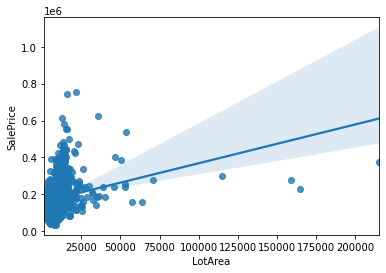

In [13]:
#After intial analysis of correlation of various features, for features having significant correlation, 
#visualizing the scatter plots could help get idea of outliers if any

#Plotting 'LotArea' vs 'SalePrice'

sns.regplot(x = "LotArea", y = "SalePrice", data = df_train)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

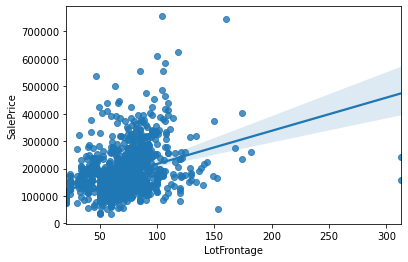

In [14]:
#Plotting 'LotFrontage' vs 'SalePrice'

sns.regplot(x = "LotFrontage", y = "SalePrice", data = df_train)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

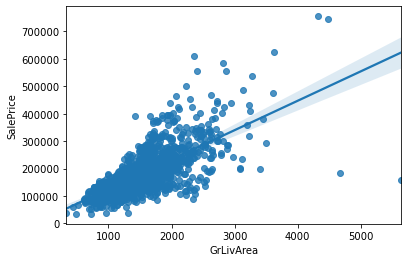

In [15]:
#Plotting 'GrLivArea' vs 'SalePrice'

sns.regplot(x = "GrLivArea", y = "SalePrice", data = df_train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

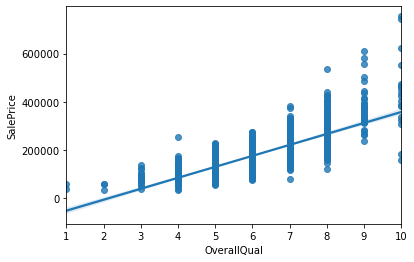

In [16]:
#Plotting 'OverallQual' vs 'SalePrice'

sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

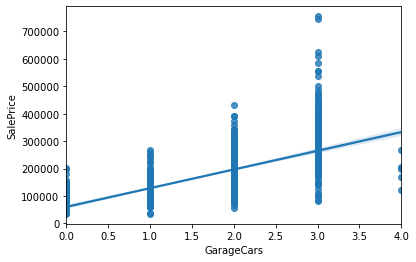

In [17]:
#Plotting 'GarageCars' vs 'SalePrice'

sns.regplot(x = 'GarageCars', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

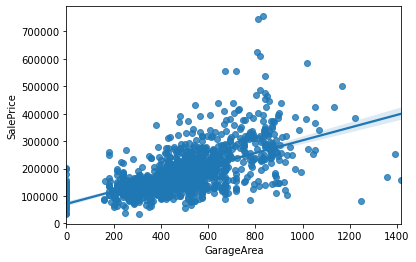

In [18]:
#Plotting 'GarageArea' vs 'SalePrice'

sns.regplot(x = "GarageArea", y = "SalePrice", data = df_train)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

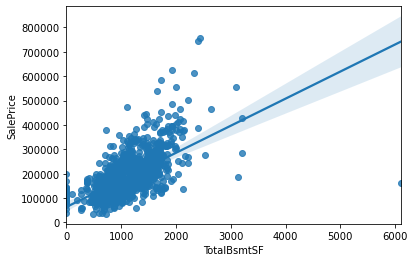

In [19]:
#Plotting 'TotalBsmtSf' vs 'SalePrice'

sns.regplot(x = 'TotalBsmtSF' , y = 'SalePrice', data = df_train)

#### Handling outliers, after going through scatter plots could see some outliers in some of the features and hence romving outliers by filtering data 

In [20]:
#Starting with 'TotalBsmtSf' few of the data points above 3000 seems to be outliers in this case,hnece filtering the data

df_train = df_train.loc[df_train["TotalBsmtSF"]<=3000]

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

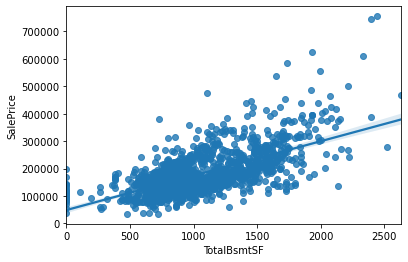

In [21]:
#Plotting the scatter plot after filtering

sns.regplot(x = 'TotalBsmtSF' , y = 'SalePrice', data = df_train)

In [22]:
# For 'GrLivArea' as well filtering the data to remove outliers

df_train = df_train.loc[df_train["GrLivArea"]<=4000]

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

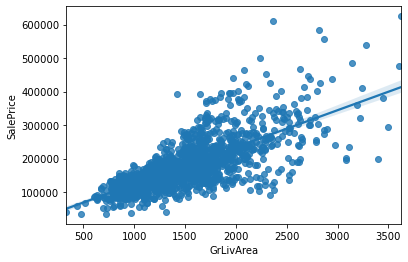

In [23]:
#Plotting graph after filtering

sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

In [24]:
# Filtering 'GarageArea' and plotting the graph

df_train = df_train.loc[df_train["GarageArea"]<=1200]

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

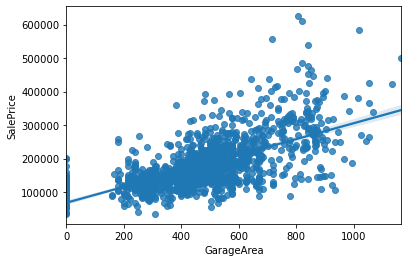

In [25]:
sns.regplot(x = "GarageArea", y ="SalePrice", data = df_train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

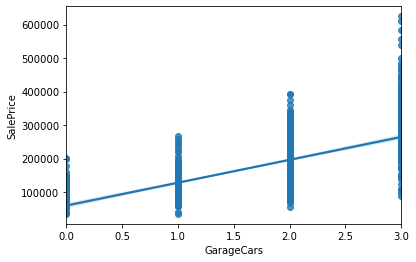

In [26]:
#Filtering data for 'GarageCars' feature and plotting the graph
df_train = df_train.loc[df_train["GarageCars"]<4]
sns.regplot(x = "GarageCars", y ="SalePrice", data = df_train)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

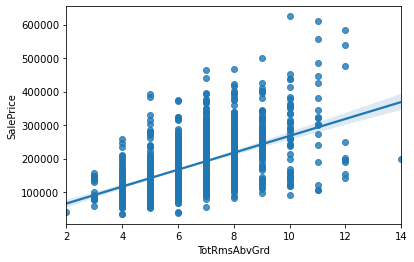

In [27]:
#'TotRmsAbvGrd' as well did show strong correlation hence plotting the relation with 'SalePrice' 
# and checking for outliers if any

sns.regplot(x = "TotRmsAbvGrd", y ="SalePrice", data = df_train)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

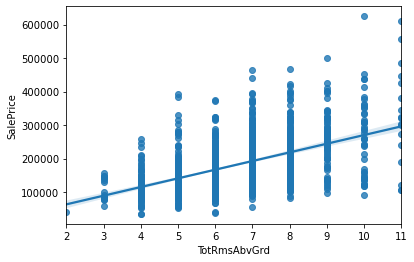

In [28]:
#Filtering data and plotting graph

df_train = df_train.loc[df_train["TotRmsAbvGrd"]<12]
sns.regplot(x = "TotRmsAbvGrd", y ="SalePrice", data = df_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

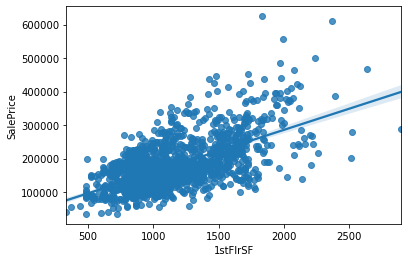

In [29]:
#Analysing '1stFlrSF' feature with help of visualizing data

sns.regplot(x = '1stFlrSF', y = "SalePrice" , data=df_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

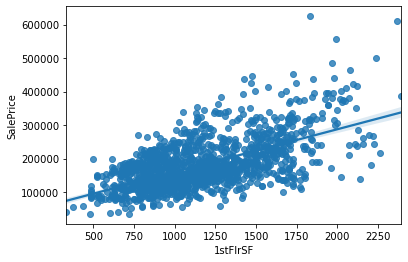

In [30]:
#Filtering and plotting graph 

df_train = df_train.loc[df_train["1stFlrSF"]<2500]
sns.regplot(x = '1stFlrSF', y = "SalePrice" , data=df_train)

In [31]:
#Filtering data for 'LotArea' feature

df_train["LotArea"].quantile([0.5,0.95,0.99])


0.50     9400.0
0.95    16703.0
0.99    34988.1
Name: LotArea, dtype: float64

In [32]:
#Since afte 0.95 the next quantile seems to be very large dropping those points ans filtering the data

df_train = df_train.loc[df_train["LotArea"]<df_train["LotArea"].quantile(0.95)]

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

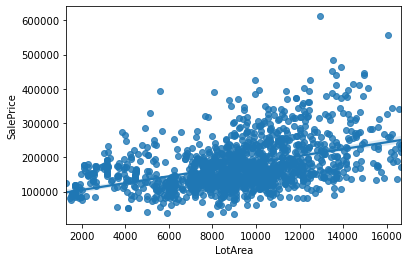

In [33]:
#Plotting graph of filtered data

sns.regplot(x = "LotArea", y = "SalePrice", data = df_train)

In [34]:
df_train.shape

(1359, 80)

In [35]:
train_rows = df_train.shape[0]

In [36]:
train_rows

1359

In [37]:
target_var = np.log(df_train["SalePrice"])

In [38]:
df_train = df_train.drop("SalePrice",axis=1)

#### Creating final dataset on which model needs to be fit. 
##### After creating the model using training dataset and evaluating, the model if found accurate woud be applied to this final dataset   

In [39]:
test_Id = df_test['Id']

In [40]:
df_test = df_test.drop('Id',axis=1)

In [41]:
#Combining train and test dataset to get complete data

dataset = pd.concat([df_train,df_test])

In [42]:
dataset.shape

(2818, 79)

In [43]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Working on training dataset to build model

In [44]:
#Looking for missing values in training data
df_train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1357
MiscFeature     1310
Alley           1271
Fence           1091
FireplaceQu      671
LotFrontage      227
GarageCond        78
GarageType        78
GarageYrBlt       78
GarageFinish      78
GarageQual        78
BsmtExposure      35
BsmtFinType1      34
BsmtCond          34
BsmtQual          34
BsmtFinType2      34
MasVnrArea         7
MasVnrType         7
Electrical         1
LandSlope          0
dtype: int64

In [45]:
#Handling missing data

df_train['PoolQC'] = df_train['PoolQC'].fillna('None')

In [46]:
for col in ('Alley', 'Fence', 'MiscFeature','FireplaceQu',):
    df_train[col] = df_train[col].fillna('None')

In [47]:
for col in ('BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

In [48]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

In [49]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

In [50]:
for col in ['MSZoning']:
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)

In [51]:
for col in ('GarageFinish', 'GarageCond', 'GarageQual', 'GarageType'):
    df_train[col] = df_train[col].fillna('None')

In [52]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0) 

In [53]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [54]:
#Looking at dataset to see if any null values needs to handled

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1359 non-null   int64  
 1   MSZoning       1359 non-null   object 
 2   LotFrontage    1132 non-null   float64
 3   LotArea        1359 non-null   int64  
 4   Street         1359 non-null   object 
 5   Alley          1359 non-null   object 
 6   LotShape       1359 non-null   object 
 7   LandContour    1359 non-null   object 
 8   Utilities      1359 non-null   object 
 9   LotConfig      1359 non-null   object 
 10  LandSlope      1359 non-null   object 
 11  Neighborhood   1359 non-null   object 
 12  Condition1     1359 non-null   object 
 13  Condition2     1359 non-null   object 
 14  BldgType       1359 non-null   object 
 15  HouseStyle     1359 non-null   object 
 16  OverallQual    1359 non-null   int64  
 17  OverallCond    1359 non-null   int64  
 18  YearBuil

In [55]:
#LotFrontage still has some missing values, hence handling those by imputing median values

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

In [56]:
# Verifying for any missing values

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1359 non-null   int64  
 1   MSZoning       1359 non-null   object 
 2   LotFrontage    1359 non-null   float64
 3   LotArea        1359 non-null   int64  
 4   Street         1359 non-null   object 
 5   Alley          1359 non-null   object 
 6   LotShape       1359 non-null   object 
 7   LandContour    1359 non-null   object 
 8   Utilities      1359 non-null   object 
 9   LotConfig      1359 non-null   object 
 10  LandSlope      1359 non-null   object 
 11  Neighborhood   1359 non-null   object 
 12  Condition1     1359 non-null   object 
 13  Condition2     1359 non-null   object 
 14  BldgType       1359 non-null   object 
 15  HouseStyle     1359 non-null   object 
 16  OverallQual    1359 non-null   int64  
 17  OverallCond    1359 non-null   int64  
 18  YearBuil

In [57]:
#Encoding data so as to convert categorical features and to fit in the model

df_train = pd.get_dummies(df_train,drop_first=True)
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
#Dividing train dataset that would be used to fit model

X = df_train
y = target_var

In [59]:
# Verifying the divide data

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [60]:
pd.DataFrame(y.head())

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [61]:
#Splitting into train and validation set into 70% and 30% respectively ensuring in correct order and not ramdomly

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,shuffle=False)

In [62]:
#Looking at splitted datasets
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
X_val.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1017,120,68.0,5814,8,5,1984,1984,0.0,1036,0,...,0,0,0,0,0,0,0,0,0,0
1018,80,68.0,10784,7,5,1991,1992,76.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1019,120,43.0,3013,7,5,2005,2005,145.0,16,0,...,0,0,0,0,1,0,0,0,1,0
1020,20,60.0,7024,4,5,2005,2005,0.0,1024,0,...,0,0,0,0,1,0,0,0,1,0
1021,20,64.0,7406,7,5,2006,2006,84.0,684,0,...,0,0,1,0,0,0,0,0,0,1


In [64]:
#Using linear regression model

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [65]:
#Predicting target variable using predict function

y_pred = regression_model.predict(X_val)

In [66]:
pd.DataFrame(y_pred)

,0
0,12.143013
1,11.995907
2,12.202520
3,11.930478
4,12.230227
...,...
403,12.121221
404,12.307035
405,12.613684
406,11.867901


In [68]:
#Checking model score(coefficient of determination R^2 of the prediction)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_val, y_val))

0.9532504823166444
0.9048571473999936


In [69]:
from sklearn.metrics import r2_score

regression_model.score(X_val, y_val)

0.9048571473999936

C:\Users\Alkesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

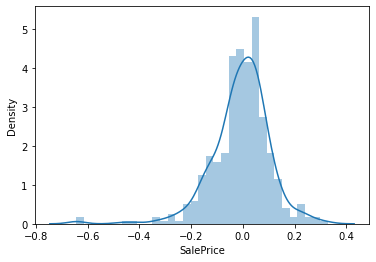

In [70]:
#Checking the distribution

sns.distplot((y_val-y_pred))

##### Since the r2 score is around 0.90, the predicted values using the model, being roughly close to given values, and the distribution seems close to normal, applying the built model to test dataset and predict the values in test dataset 

In [71]:
# Applying the above steps of handling missing data and encoding categorical columns 
# on final dataset created that consists of test set
#Looking for missing values in final dataset

dataset.isna().sum().sort_values(ascending=False).head(20)

PoolQC          2813
MiscFeature     2718
Alley           2623
Fence           2260
FireplaceQu     1401
LotFrontage      454
GarageCond       156
GarageQual       156
GarageYrBlt      156
GarageFinish     156
GarageType       154
BsmtCond          79
BsmtExposure      79
BsmtQual          78
BsmtFinType1      76
BsmtFinType2      76
MasVnrType        23
MasVnrArea        22
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [72]:
dataset['PoolQC'] = dataset['PoolQC'].fillna('None')

In [73]:
for col in ('Alley', 'Fence', 'MiscFeature','FireplaceQu',):
    dataset[col] = dataset[col].fillna('None')

In [74]:
for col in ('BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

In [75]:
for col in ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    dataset[col] = dataset[col].fillna(0)

In [76]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')

In [77]:
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [78]:
for col in ['MSZoning','Utilities','Street','Heating']:
    dataset[col].fillna(dataset[col].mode()[0],inplace=True)

In [79]:
dataset['Functional'] = dataset['Functional'].fillna('Typ')

In [80]:
#Looking at dataset to check remaining missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2818 non-null   int64  
 1   MSZoning       2818 non-null   object 
 2   LotFrontage    2364 non-null   float64
 3   LotArea        2818 non-null   int64  
 4   Street         2818 non-null   object 
 5   Alley          2818 non-null   object 
 6   LotShape       2818 non-null   object 
 7   LandContour    2818 non-null   object 
 8   Utilities      2818 non-null   object 
 9   LotConfig      2818 non-null   object 
 10  LandSlope      2818 non-null   object 
 11  Neighborhood   2818 non-null   object 
 12  Condition1     2818 non-null   object 
 13  Condition2     2818 non-null   object 
 14  BldgType       2818 non-null   object 
 15  HouseStyle     2818 non-null   object 
 16  OverallQual    2818 non-null   int64  
 17  OverallCond    2818 non-null   int64  
 18  YearBuil

In [81]:
#Still couple of missing values needs to be handled after looking at the info

dataset['SaleType'] = dataset['SaleType'].fillna('Oth')

In [82]:
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [83]:
for col in ('GarageFinish', 'GarageCond', 'GarageQual', 'GarageType'):
    dataset[col] = dataset[col].fillna('None')

In [84]:
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)

In [85]:
for col in ('BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'):
    dataset[col] = dataset[col].fillna(0)

In [86]:
for col in ('Exterior1st','Exterior2nd'):
    dataset[col] = dataset[col].fillna("Other")

In [87]:
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

In [88]:
# Checking/verifying for any missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2818 non-null   int64  
 1   MSZoning       2818 non-null   object 
 2   LotFrontage    2364 non-null   float64
 3   LotArea        2818 non-null   int64  
 4   Street         2818 non-null   object 
 5   Alley          2818 non-null   object 
 6   LotShape       2818 non-null   object 
 7   LandContour    2818 non-null   object 
 8   Utilities      2818 non-null   object 
 9   LotConfig      2818 non-null   object 
 10  LandSlope      2818 non-null   object 
 11  Neighborhood   2818 non-null   object 
 12  Condition1     2818 non-null   object 
 13  Condition2     2818 non-null   object 
 14  BldgType       2818 non-null   object 
 15  HouseStyle     2818 non-null   object 
 16  OverallQual    2818 non-null   int64  
 17  OverallCond    2818 non-null   int64  
 18  YearBuil

In [89]:
#Few missing values in LotFrontage,GarageCars,GarageArea, handling those missing values

dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

In [90]:
dataset['GarageCars'] = dataset['GarageCars'].fillna(dataset['GarageCars'].median())

In [91]:
dataset['GarageArea'] = dataset['GarageArea'].fillna(dataset['GarageArea'].median())

In [92]:
#Verifying dataset

dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


In [93]:
#Encoding categorical features

dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [94]:
#Splitting train and test data

# train dataset
df_train_sp = dataset.iloc[:train_rows,:]

# test dataset
df_test_sp = dataset.iloc[train_rows:,:]

In [95]:
X = df_train_sp
y = target_var

In [96]:
#Splitting train and test set in 70% and 30%

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)

In [97]:
#Fitting regression model on dataset

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = regression_model.predict(X_test)

In [99]:
pd.DataFrame(y_pred)

,0
0,12.143013
1,11.995907
2,12.202520
3,11.930478
4,12.230227
...,...
403,12.121221
404,12.307035
405,12.613684
406,11.867901


In [100]:
regression_model.score(X_test, y_test)

0.9048571470694647

In [101]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9048571470694647

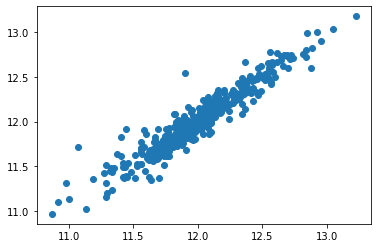

In [102]:
#Plotting the graph

plt.scatter(y_test, y_pred)

In [103]:
#Checking root mean squared error

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test)))
print(rmse)

0.1135305121674919


#### Output Prediction

In [104]:
#Converting log values and predicting final house prices
log_predicted_values = regression_model.predict(df_test_sp)

In [105]:
predicted_values = np.exp(log_predicted_values)

In [106]:
print(predicted_values)

[121514.02635909 159290.11309726 193650.15288367 ... 191799.78968057
 128533.48832682 216478.44185785]


In [107]:
#Creating a data dictionary

data_dict = {'Id':test_Id,'SalePrice':predicted_values}

submit = pd.DataFrame(data_dict)
submit.to_csv('predictedprice.csv',index=False)

C:\Users\Alkesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

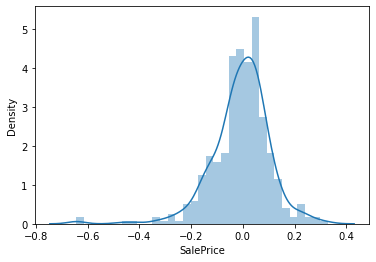

In [108]:
#Checking distribution of predicted price 
sns.distplot((y_test-y_pred))